In [212]:
import pandas as pd
from plotnine import *
import numpy as np
# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', None)

In [297]:
df = pd.read_csv("full_data.csv")

c:\users\sriha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,18,37,41,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.


In [298]:
df.head()

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc
0,AE,Uttar_Pradesh,3,1,1962,2,0,1,1,KRISHNA SINGH,M,INC,16132.0,NaN,22448.0,89586.0,UTTARKASHI,GEN,NaN,3,25.06,71.86,no,12925,57.58,1.79,AEUP173774,National Party,3482.0,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,Uttar_Pradesh,3,1,1962,2,0,1,2,KAMLA RAM,M,IND,3207.0,NaN,22448.0,89586.0,UTTARKASHI,GEN,NaN,3,25.06,14.29,yes,98,0.44,1.79,AEUP5637,Independents,10809.0,True,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AE,Uttar_Pradesh,3,1,1962,2,0,1,3,PREM SINGH PANWAR,M,JS,3109.0,NaN,22448.0,89586.0,UTTARKASHI,GEN,NaN,3,25.06,13.85,yes,0,0.00,1.79,AEUP176810,National Party,4152.0,True,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AE,Uttar_Pradesh,3,2,1962,2,0,1,1,TREPAN SINGH,M,INC,16887.0,NaN,25626.0,98852.0,TEHRI,GEN,NaN,4,25.92,65.90,no,12600,49.17,2.08,AEUP4,National Party,3482.0,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AE,Uttar_Pradesh,3,2,1962,2,0,1,2,VIDYA SAGAR,M,CPI,4287.0,NaN,25626.0,98852.0,TEHRI,GEN,NaN,4,25.92,16.73,no,2061,8.04,2.08,AEUP176812,National Party,2444.0,True,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
df.columns

Index(['Election_Type', 'State_Name', 'Assembly_No', 'Constituency_No', 'Year',
       'month', 'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID',
       'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'Age', 'District_Name', 'PC_Name',
       'PC_No', 'CandID', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc'],
      dtype='object')

In [300]:
df['Incumbency_Value'] = np.where(df['Incumbent'] == 'False', 0, df['Incumbent'])
df['Winner'] = np.where(df['Position'] == 1, 1,0)

In [301]:
df.head()

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Incumbency_Value,Winner
0,AE,Uttar_Pradesh,3,1,1962,2,0,1,1,KRISHNA SINGH,M,INC,16132.0,NaN,22448.0,89586.0,UTTARKASHI,GEN,NaN,3,25.06,71.86,no,12925,57.58,1.79,AEUP173774,National Party,3482.0,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,AE,Uttar_Pradesh,3,1,1962,2,0,1,2,KAMLA RAM,M,IND,3207.0,NaN,22448.0,89586.0,UTTARKASHI,GEN,NaN,3,25.06,14.29,yes,98,0.44,1.79,AEUP5637,Independents,10809.0,True,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,AE,Uttar_Pradesh,3,1,1962,2,0,1,3,PREM SINGH PANWAR,M,JS,3109.0,NaN,22448.0,89586.0,UTTARKASHI,GEN,NaN,3,25.06,13.85,yes,0,0.00,1.79,AEUP176810,National Party,4152.0,True,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,AE,Uttar_Pradesh,3,2,1962,2,0,1,1,TREPAN SINGH,M,INC,16887.0,NaN,25626.0,98852.0,TEHRI,GEN,NaN,4,25.92,65.90,no,12600,49.17,2.08,AEUP4,National Party,3482.0,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,AE,Uttar_Pradesh,3,2,1962,2,0,1,2,VIDYA SAGAR,M,CPI,4287.0,NaN,25626.0,98852.0,TEHRI,GEN,NaN,4,25.92,16.73,no,2061,8.04,2.08,AEUP176812,National Party,2444.0,True,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [302]:
df['Incumbency_Value'].value_counts()

0    81888
1     2848
Name: Incumbency_Value, dtype: int64

In [303]:
latestelections=df[(df['Year']==2022)| (df['Year']==2017)]
previouselections=df[(df['Year']==2012)| (df['Year']==2007)]
everyotherelection = df[(df['Year'].isin([1985,1989,1993,1996]))]
everyotherelectionpast = df[(df['Year'].isin([1962,1967,1969,1975,1977,1980]))]

In [304]:
latestelections=latestelections.dropna(subset=['Winner','No_Terms','Turnout_Percentage','ENOP'])
previouselections=previouselections.dropna(subset=['Winner','No_Terms','Turnout_Percentage','ENOP'])
everyotherelection=everyotherelection.dropna(subset=['Winner','No_Terms','Turnout_Percentage','ENOP'])
everyotherelectionpast=everyotherelectionpast.dropna(subset=['Winner','No_Terms','Turnout_Percentage','ENOP'])

In [323]:
model = smf.logit("Winner ~ No_Terms + Turnout_Percentage + ENOP", data=latestelections)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.182613
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                 9295
Model:                          Logit   Df Residuals:                     9291
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.3807
Time:                        19:43:23   Log-Likelihood:                -1697.4
converged:                       True   LL-Null:                       -2740.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.8997      0.614     -6.355      0.000      -5.102      -2.697
No_Terms               2.0424      0.059     34.393      0.000       1.926       2.159
Turnout_Percentage     0.0045      0.008      0.534      0.593      -0.012       0.021
ENOP                   0.0586      0.096      0.613      0.540      -0.129       0.246
======================================================================================
"""

In [324]:
latestcoefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})

In [325]:
latestcoefs

,coef,odds ratio,name
0,-3.899675,0.020248,Intercept
1,2.042368,7.708840,No_Terms
2,0.004512,1.004522,Turnout_Percentage
3,0.058567,1.060316,ENOP


In [309]:
model = smf.logit("Winner ~ No_Terms + Turnout_Percentage + ENOP", data=previouselections)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.153780
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                12972
Model:                          Logit   Df Residuals:                    12968
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.3418
Time:                        19:18:32   Log-Likelihood:                -1994.8
converged:                       True   LL-Null:                       -3030.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.8255      0.335    -11.411      0.000      -4.483      -3.168
No_Terms               1.7044      0.049     35.132      0.000       1.609       1.800
Turnout_Percentage     0.0069      0.005      1.369      0.171      -0.003       0.017
ENOP                  -0.0401      0.045     -0.888      0.375      -0.129       0.048
======================================================================================
"""

In [310]:
previouscoefs

,coef,odds ratio,name
0,-2.909332,0.054512,Intercept
1,1.821779,6.182850,No_Terms
2,0.007973,1.008004,Turnout_Percentage
3,-0.026631,0.973720,ENOP
4,-0.024730,0.975573,Age


In [316]:
previouscoefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})

In [317]:
model = smf.logit("Winner ~ No_Terms + Turnout_Percentage + ENOP", data=everyotherelection)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.133733
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                26149
Model:                          Logit   Df Residuals:                    26145
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.4429
Time:                        19:18:50   Log-Likelihood:                -3497.0
converged:                       True   LL-Null:                       -6276.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.9774      0.237    -12.564      0.000      -3.442      -2.513
No_Terms               2.5857      0.047     54.443      0.000       2.493       2.679
Turnout_Percentage    -0.0133      0.004     -3.494      0.000      -0.021      -0.006
ENOP                  -0.0694      0.035     -1.999      0.046      -0.137      -0.001
======================================================================================
"""

In [318]:
oldcoefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})

In [314]:
oldcoefs

,coef,odds ratio,name
0,-2.977435,0.050923,Intercept
1,2.585705,13.272646,No_Terms
2,-0.013316,0.986772,Turnout_Percentage
3,-0.069387,0.932965,ENOP


In [319]:
model = smf.logit("Winner ~ No_Terms + Turnout_Percentage + ENOP", data=everyotherelectionpast)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.126340
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                16160
Model:                          Logit   Df Residuals:                    16156
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.6763
Time:                        19:19:11   Log-Likelihood:                -2041.6
converged:                       True   LL-Null:                       -6306.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.4925      0.263    -20.862      0.000      -6.009      -4.977
No_Terms               5.6107      0.100     56.132      0.000       5.415       5.807
Turnout_Percentage     0.0179      0.004      4.122      0.000       0.009       0.026
ENOP                   0.0013      0.035      0.036      0.971      -0.067       0.070
======================================================================================
"""

In [320]:
oldercoefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})

In [321]:
oldercoefs

,coef,odds ratio,name
0,-5.492516,0.004117,Intercept
1,5.610708,273.337653,No_Terms
2,0.017905,1.018066,Turnout_Percentage
3,0.001254,1.001255,ENOP


In [139]:
winners['predict']=results.predict()

<ipython-input-139-c1536551efd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [140]:
wi

NameError: name 'wi' is not defined

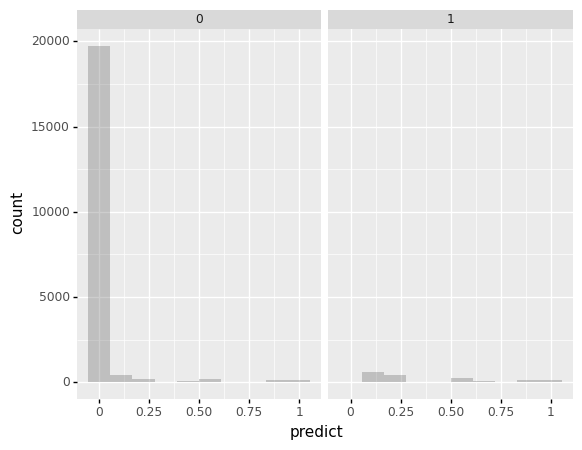

<ggplot: (97580886086)>

In [116]:
(
    ggplot(winners, aes(x='predict')) + geom_histogram(alpha=0.3, bins=10) + facet_wrap('winner')
)

In [ ]:
#How to explain victory through incumbency. 
#Try it at an election level - is an incumbent running and did they win 

In [ ]:
Was there an incumbent in the election, details about the previous party

In [ ]:
Partisan Voter Index = look at previous two elections (or maybe even a midterm) and see if this makes sense

In [ ]:
Assuming my model is good, who are people that should have won but didnt. 